In [1]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndci(caminho_b1, caminho_b2):
    with rasterio.open(caminho_b1) as src_b1, rasterio.open(caminho_b2) as src_b2:
        # Ler os dados das bandas como matrizes numpy
        b1 = src_b1.read(1).astype(float)
        b2 = src_b2.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor após a normalização
        print(f'Max value in b1: {np.max(b1)}')
        if np.min(b1)==0:
            # Encontrar o menor valor em b1 maior que zero
            min_positive_b1 = np.min(b1[(b1 > 0)])
            # Exibir o menor valor presente em b1 maior que zero
            print(f'Min value in b1: {min_positive_b1}')
        else:
            print(f'Min value in b1: {np.min(b1)}')
        print(f'Max value in b2: {np.max(b2)}')
        if np.min(b2)==0:
            # Encontrar o menor valor em b2 maior que zero
            min_positive_b2 = np.min(b2[(b2 > 0)])
            # Exibir o menor valor presente em b2 maior que zero
            print(f'Min value in b2: {min_positive_b2}')
        else:
            print(f'Min value in b2: {np.min(b2)}')

        # Mostrar o número de elementos em b2
        print(f'Number of elements in b2: {np.size(b2)}')
        # Mostrar o número de elementos em b1
        print(f'Number of elements in b1: {np.size(b1)}')

        # Contar o número de elementos com valor 0 em b2
        num_zeros_b2 = np.count_nonzero(b2 == 0)
        print(f'Number of elements with value 0 in b2: {num_zeros_b2}')
        # Contar o número de elementos com valor 0 em b1
        num_zeros_b1 = np.count_nonzero(b1 == 0)
        print(f'Number of elements with value 0 in b1: {num_zeros_b1}')

        # Máscara para considerar apenas valores diferentes de zero em b1 e b2
        mask_nonzero = (b1 != 0) & (b2 != 0)

        # Calcular NDCI apenas para os valores não nulos em b1 e b2
        ndci = np.zeros_like(b1, dtype=float)
        ndci[mask_nonzero] = (b1[mask_nonzero] - b2[mask_nonzero]) / (b1[mask_nonzero] + b2[mask_nonzero])

        # Exibir o NDCI resultante
        print(f'Max value in ndci: {np.max(ndci)}')
        # Encontrar o menor valor em ndci maior que zero
        min_positive_ndci = np.min(ndci[(ndci > 0)])
        # Exibir o menor valor presente em ndci maior que zero
        print(f'Min value in ndci: {min_positive_ndci}')

        # Exibir o NDCI
        plt.imshow(ndci, cmap='RdYlGn', vmin=-1, vmax=1)
        plt.colorbar(label='NDCI')
        plt.title('Índice de Concentração de Deoxirribonucleico (NDCI)')
        plt.show()

Max value in b1: 7936.0
Min value in b1: 2209.0
Max value in b2: 2189.0
Min value in b2: 478.0
Number of elements in b2: 49
Number of elements in b1: 49
Number of elements with value 0 in b2: 7
Number of elements with value 0 in b1: 7
Max value in ndci: 0.7385120350109409
Min value in ndci: 0.36130374479889044


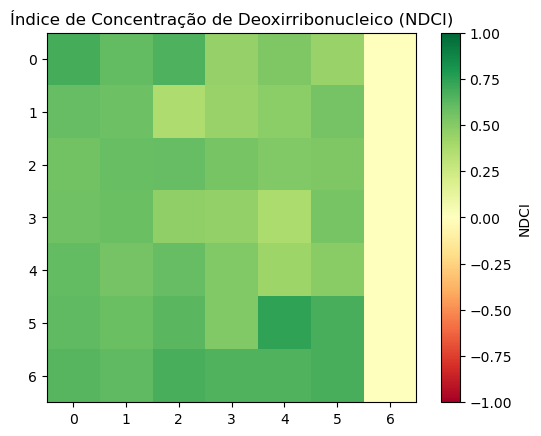

In [2]:
# Exemplo de uso da função
caminho_b1 = '/home/barcelos/Desktop/L/ML14/ML14CUTB1/2014-11-29-00:00_2014-11-29-23:59_MODIS_B1_CUT.tif'
caminho_b2 = '/home/barcelos/Desktop/L/ML14/ML14CUTB2/2014-11-29-00:00_2014-11-29-23:59_MODIS_B2_CUT.tif'
calculate_ndci(caminho_b1, caminho_b2)